In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/titanic_toy.csv')

print('Rows:', df.shape[0], 'Columns:', df.shape[1])
df.sample(3)

Rows: 891 Columns: 4


,Age,Fare,Family,Survived
541,9.0,31.275,6,0
525,40.5,7.750,0,0
170,61.0,33.500,0,0


In [6]:
df.isna().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [9]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [11]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [12]:
X_train.sample(3)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
568,NaN,7.2292,0,29.785904,28.75,7.2292,7.2292
622,20.0,15.7417,2,20.000000,20.00,15.7417,15.7417
136,19.0,26.2833,2,19.000000,19.00,26.2833,26.2833


In [16]:
print('Original Age Variance: ', X_train['Age'].var())
print('Age Variance after Mean Imputance: ', X_train['Age_mean'].var())
print('Age Variance after Median Imputance: ', X_train['Age_median'].var())

print('\nOriginal Fare variance: ', X_train['Fare'].var())
print('Fare Variance after Mean Imputance: ', X_train['Fare_mean'].var())
print('Fare Variance after Median Imputance: ', X_train['Fare_median'].var())

Original Age Variance:  204.34951339046142
Age Variance after Mean Imputance:  161.81262452718676
Age Variance after Median Imputance:  161.98956633460548

Original Fare variance:  2448.1979137063163
Fare Variance after Mean Imputance:  2324.2385256705534
Fare Variance after Median Imputance:  2340.09102197536


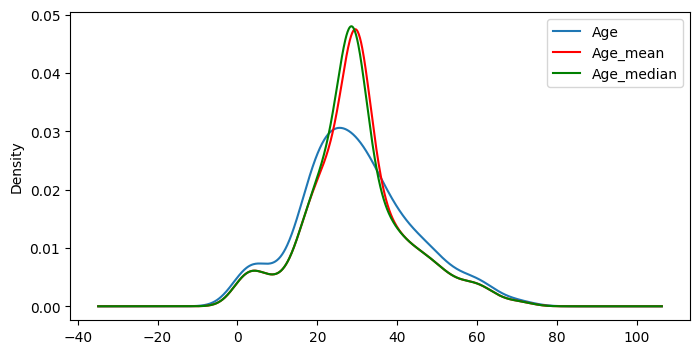

In [20]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# original variance distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the mean 
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels() 
ax.legend(lines, labels, loc='best')

plt.show()

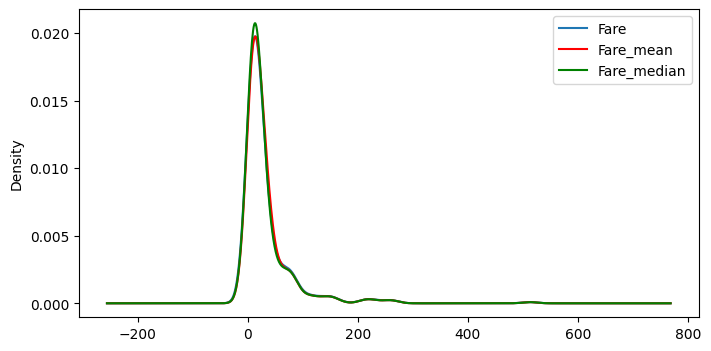

In [21]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# original variance distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the mean 
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels() 
ax.legend(lines, labels, loc='best')

plt.show()

In [22]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


<Axes: >

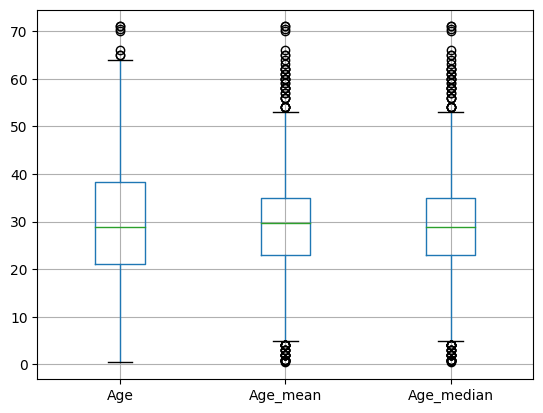

In [23]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

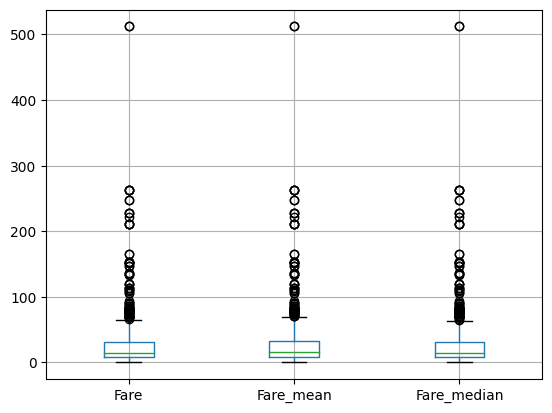

In [24]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

## **Now we'll do same thing using SKLearn**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
from sklearn.impute import SimpleImputer

impute1 = SimpleImputer(strategy='mean')
impute2 = SimpleImputer(strategy='median')

In [27]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer(transformers=[
    ('impute1', impute1, ['Age']),
    ('impute2', impute2, ['Fare'])
], remainder='passthrough')

In [28]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(), ['Age']),
                                ('impute2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [29]:
X_train_imputed = trf.transform(X_train)
X_test_imputed = trf.transform(X_test)

In [31]:
X_train_imputed

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

<Axes: >

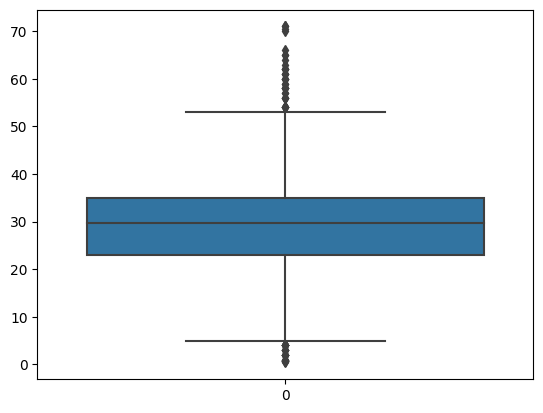

In [36]:
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

import seaborn as sns
sns.boxplot(X_train['Age'])